# Last Letters

**🎯 Analyze which last letters appear most frequently in first names.**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
path = '../names'

## Task 1

Read all files from the [Baby Name Dataset](http://www.ssa.gov/oact/babynames/limits.html) into a single `DataFrame`. The `DataFrame` should have the columns **name**, **gender**, **number** and **year**.

In [3]:
data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)
df.shape

(2052781, 4)

## Task 2

Create an extra column with the last letter of each name.

In [4]:
df["last"] = df["name"].str[-1]
df.head(3)

,name,gender,count,year,last
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a


## Task 3

Create a bar plot showing the count of each last letter.

In [5]:
# only consider unique names, otherwise letters for frequent names are overrepresented
unique = df.groupby(["name"])["last"].first()  # we need the last letter for each name only once
unique.head(3)

name
Aaban    n
Aabha    a
Aabid    d
Name: last, dtype: object

Text(0.5, 1.0, 'number of names by last letter')

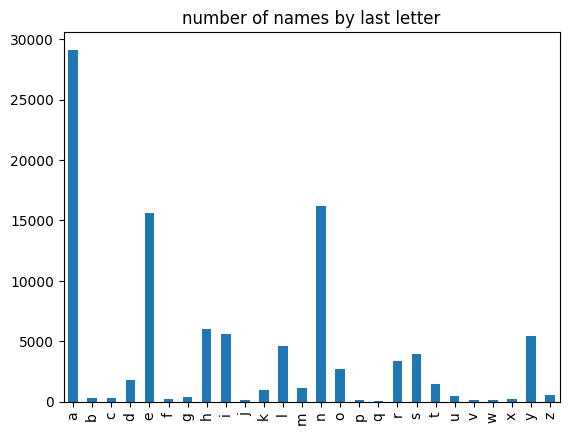

In [6]:
unique.value_counts().sort_index().plot.bar()
plt.title("number of names by last letter")

## Task 4

Now, create a timeline for one last letter.

First, select that letter over all years.
Second, group by the year and calculate the count for each year.

In [7]:
otime = df[df["last"] == "o"].groupby("year")["last"].count()
otime.head(3)

year
1880    35
1881    34
1882    37
Name: last, dtype: int64

Finally, create a line plot from this data.

<AxesSubplot: xlabel='year'>

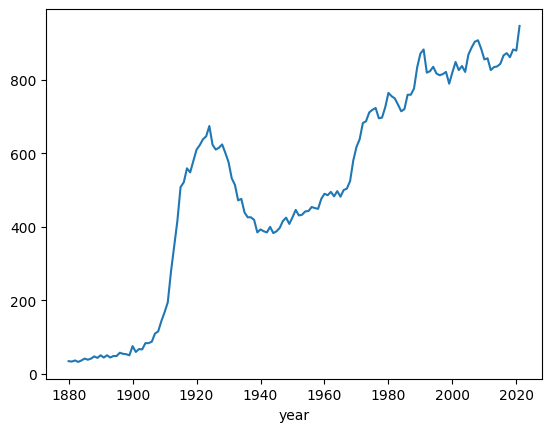

In [8]:
otime.plot()

## Task 5

Let's plot multiple timelines.

Count the names grouped by last letter **and** year.

Convert the DataFrame to a **crosstable** that has the year in the row index and the letters in the column index.
You can do this with the expression

In [9]:
g = df.groupby(["last", "year"])["name"].count()
cross = g.unstack(0)
cross.head(3)

last,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
year,,,,,,,,,,,,,,,,,,,,,
1880,450.0,7.0,7.0,93.0,490.0,7.0,9.0,60.0,7.0,NaN,...,NaN,89.0,125.0,76.0,5.0,1.0,7.0,4.0,148.0,4.0
1881,432.0,6.0,8.0,85.0,484.0,5.0,13.0,59.0,6.0,NaN,...,NaN,83.0,116.0,78.0,4.0,1.0,7.0,5.0,142.0,2.0
1882,478.0,7.0,8.0,96.0,538.0,8.0,10.0,70.0,6.0,NaN,...,NaN,87.0,124.0,83.0,3.0,1.0,8.0,5.0,167.0,4.0


Draw a line plot showing the frequency of the letters **d**, **n** and **y**.
Try other ones if you like.

<AxesSubplot: xlabel='year'>

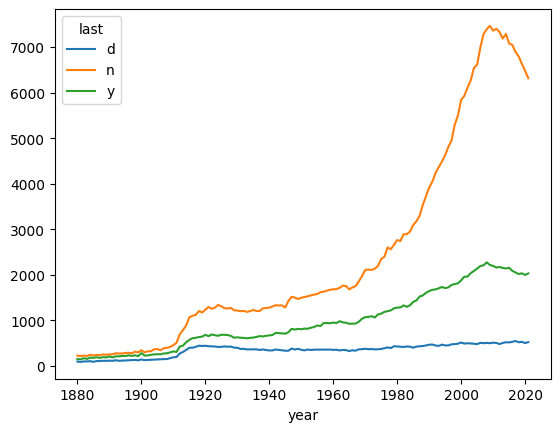

In [10]:
cross[["d", "n", "y"]].plot()

<AxesSubplot: xlabel='year'>

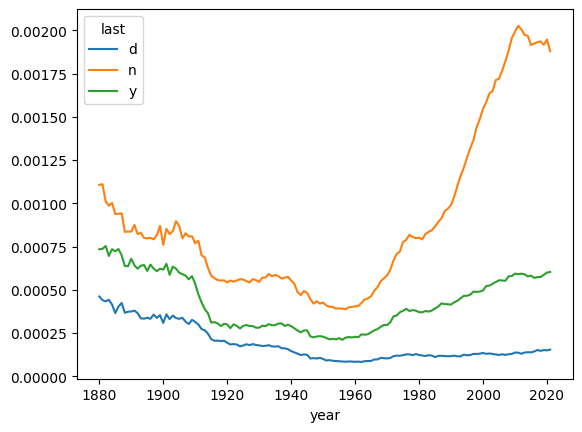

In [11]:
# normalize by number of births per year
yeartotal = df.groupby("year")["count"].sum()
crossnormal = (cross.transpose() / yeartotal).transpose()  # division is column-based

crossnormal[["d", "n", "y"]].plot()

## Task 6

Finally, let's look for frequent first/last letter combinations.

1. Add an extra column containing the first letter.
2. Cross-tabulate by grouping by first and last letter and count the names (over all years).

Now you should have a table with first letters in columns an last letters in rows (or vice versa).

Plot a heatmap (check the [Seaborn Example Gallery](http://seaborn.pydata.org/examples/index.html)).

<AxesSubplot: xlabel='last', ylabel='first'>

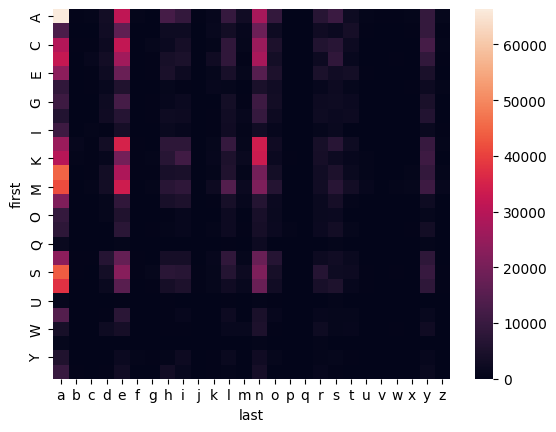

In [12]:
df["first"] = df["name"].str[0]
firstlast = df.groupby(["first", "last"])["name"].count().unstack().fillna(0).astype(int)

sns.heatmap(firstlast)